<a href="https://colab.research.google.com/github/aloktripathi13/TimeSeriesRepositories/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import os
import numpy as np
import pandas as pd


In [ ]:
zip_path=tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)

In [ ]:
csv_path,_=os.path.splitext(zip_path)

In [ ]:
df=pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
df=df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


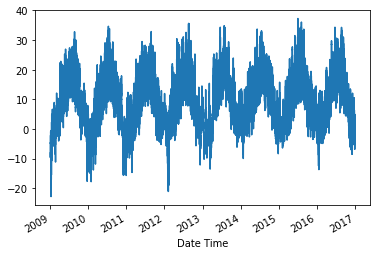

In [ ]:
temp=df['T (degC)']
temp.plot()

In [ ]:
#Input            Output
#[[[1], [2], [3], [4], [5]]] [6]
#[[2, 3, 4, 5, 6]] [7]
#[[3, 4, 5, 6, 7]] [8]
def df_to_X_y(df, window_size=5):
  df_as_np=df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row=[[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label=df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)


In [ ]:
WINDOW_SIZE=5
X,y=df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [ ]:
X_train, y_train=X[:60000], y[:60000]
X_val, y_val=X[60000:65000], y[60000:65000]
X_test, y_test=X[65000:], y[65000:]
X_train.shape,y_train.shape, X_val.shape,y_val.shape , X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1=Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
#compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 33.8472 - root_mean_squared_error: 5.8178 - val_loss: 1.9673 - val_root_mean_squared_error: 1.4026


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 3.0640 - root_mean_squared_error: 1.7504 - val_loss: 0.6871 - val_root_mean_squared_error: 0.8289


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0209 - root_mean_squared_error: 1.0104 - val_loss: 0.5398 - val_root_mean_squared_error: 0.7347


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7308 - root_mean_squared_error: 0.8549 - val_loss: 0.5154 - val_root_mean_squared_error: 0.7179


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6844 - root_mean_squared_error: 0.8273 - val_loss: 0.5003 - val_root_mean_squared_error: 0.7073


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6690 - root_mean_squared_error: 0.8179 - val_loss: 0.4961 - val_root_mean_squared_error: 0.7044


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6611 - root_mean_squared_error: 0.8131 - val_loss: 0.5046 - val_root_mean_squared_error: 0.7104
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6560 - root_mean_squared_error: 0.8099 - val_loss: 0.4902 - val_root_mean_squared_error: 0.7002


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6518 - root_mean_squared_error: 0.8074 - val_loss: 0.5048 - val_root_mean_squared_error: 0.7105
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6494 - root_mean_squared_error: 0.8058 - val_loss: 0.5039 - val_root_mean_squared_error: 0.7099


In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('model1/')

In [ ]:
train_predictions=model1.predict(X_train ).flatten()
train_results= pd.DataFrame(data={'Train Prediction':train_predictions,'Actuals':y_train})
train_results

,Train Prediction,Actuals
0,-9.717703,-9.67
1,-9.598233,-9.17
2,-8.728855,-8.10
3,-7.219522,-7.66
4,-7.069620,-7.04
...,...,...
59995,5.994203,6.07
59996,7.127576,9.88
59997,12.278812,13.53
59998,16.060003,15.43


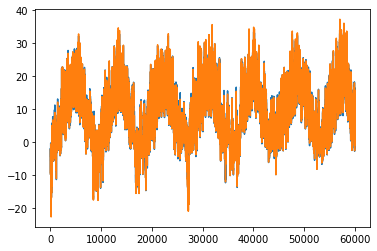

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train Prediction'])
plt.plot(train_results['Actuals'])
#try these two line after commenting above two lines
#plt.plot(train_results['Train Prediction'][100:300],linewidth=3)
#plt.plot(train_results['Actuals'][100:300])

In [ ]:
#Lets run the same code for X_val and y_val
val_predictions=model1.predict(X_val ).flatten()
val_results= pd.DataFrame(data={'Val Prediction':val_predictions,'Actuals':y_val})
val_results

,Val Prediction,Actuals
0,15.402212,14.02
1,13.168718,13.67
2,13.030937,12.27
3,11.431425,11.19
4,10.372028,10.85
...,...,...
4995,17.103615,18.27
4996,17.272011,17.85
4997,17.136471,16.65
4998,15.799694,15.85


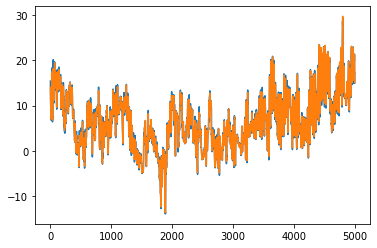

In [52]:
plt.plot(val_results['Val Prediction'])
plt.plot(val_results['Actuals'])
#try these two line after commenting above two lines
#plt.plot(val_results['Val Prediction'][100:300],linewidth=3)
#plt.plot(val_results['Actuals'][100:300])